In [1]:
import requests
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

requestURL = "https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/iris/iris.data.csv"
df = pd.read_csv(requestURL)
df.columns = ['Sepal.Length', 'Sepal.Width','Petal.Length','Petal.Width','Species']
df.head(15)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


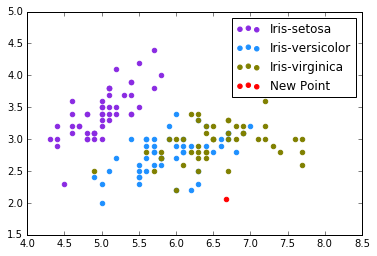

In [3]:
species1_df = df[df['Species']=="Iris-setosa"]
species2_df = df[df['Species']=="Iris-versicolor"]
species3_df = df[df['Species']=="Iris-virginica"]

plt.scatter(species1_df['Sepal.Length'], species1_df['Sepal.Width'], label = 'Iris-setosa', color='blueviolet')
plt.scatter(species2_df['Sepal.Length'], species2_df['Sepal.Width'], label = 'Iris-versicolor', color='dodgerblue')
plt.scatter(species3_df['Sepal.Length'], species3_df['Sepal.Width'], label = 'Iris-virginica', color='olive')

new_point = [rand.uniform(min(df['Sepal.Length']), max(df['Sepal.Length'])), rand.uniform(min(df['Sepal.Width']), max(df['Sepal.Width']))]

plt.scatter(new_point[0], new_point[1], label = 'New Point', color='red')

plt.legend()

plt.show()

In [4]:
dist = [sqrt((pow(sl-new_point[0],2))+pow(sw-new_point[1],2)) for sl, sw in zip(df['Sepal.Length'].tolist(), df['Sepal.Width'].tolist())]
df['Distance'] = dist
df = df.sort_values(by='Distance')
df = df.reset_index(drop=True)
ten_closest = df[:10]
ten_closest

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Distance
0,6.7,2.5,5.8,1.8,Iris-virginica,0.439309
1,6.3,2.3,4.4,1.3,Iris-versicolor,0.445471
2,6.2,2.2,4.5,1.5,Iris-versicolor,0.495925
3,6.3,2.5,5.0,1.9,Iris-virginica,0.577848
4,6.3,2.5,4.9,1.5,Iris-versicolor,0.577848
5,6.0,2.2,4.0,1.0,Iris-versicolor,0.690217
6,6.0,2.2,5.0,1.5,Iris-virginica,0.690217
7,6.4,2.7,5.3,1.9,Iris-virginica,0.695804
8,6.3,2.7,4.9,1.8,Iris-virginica,0.741197
9,6.8,2.8,4.8,1.4,Iris-versicolor,0.748972


In [7]:
from collections import Counter

top_classes = Counter(ten_closest['Species'].tolist())
most_com_class = top_classes.most_common()[0][0]

print('The majority class is %s' % most_com_class)

The majority class is Iris-virginica
